##### ID: ID of each client
##### LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
##### SEX: Gender (1=male, 2=female)
##### EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
##### MARRIAGE: Marital status (1=married, 2=single, 3=others)
##### AGE: Age in years
##### PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
##### PAY_2: Repayment status in August, 2005 (scale same as above)
##### PAY_3: Repayment status in July, 2005 (scale same as above)
##### PAY_4: Repayment status in June, 2005 (scale same as above)
##### PAY_5: Repayment status in May, 2005 (scale same as above)
##### PAY_6: Repayment status in April, 2005 (scale same as above)
##### BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
##### BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
##### BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
##### BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
##### BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
##### BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
##### PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
##### PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
##### PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
##### PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
##### PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
##### PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
##### default.payment.next.month: Default payment (1=yes, 0=no)

In [1]:
%pip install prettytable

Note: you may need to restart the kernel to use updated packages.


In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

from prettytable import PrettyTable
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler



In [32]:
df = pd.read_csv("data/UCI_Credit_Card.csv")
df.drop(['ID'],axis=1,inplace=True)
df.rename(columns={'PAY_0':'PAY_1','default.payment.next.month':"default_pay"},inplace=True)
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_pay
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [33]:
df["EDUCATION"] = df["EDUCATION"].replace(0, 4)
df["EDUCATION"] = df["EDUCATION"].replace(5, 4)
df["EDUCATION"] = df["EDUCATION"].replace(6, 4)
df["MARRIAGE"] = df["MARRIAGE"].replace(0, 3)
df["EDUCATION"].value_counts()
df['MARRIAGE'].value_counts()

MARRIAGE
2    15964
1    13659
3      377
Name: count, dtype: int64

In [34]:
rows, col = df.shape
print(f'The dataset has {rows} rows and {col} columns.')

The dataset has 30000 rows and 24 columns.


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LIMIT_BAL    30000 non-null  float64
 1   SEX          30000 non-null  int64  
 2   EDUCATION    30000 non-null  int64  
 3   MARRIAGE     30000 non-null  int64  
 4   AGE          30000 non-null  int64  
 5   PAY_1        30000 non-null  int64  
 6   PAY_2        30000 non-null  int64  
 7   PAY_3        30000 non-null  int64  
 8   PAY_4        30000 non-null  int64  
 9   PAY_5        30000 non-null  int64  
 10  PAY_6        30000 non-null  int64  
 11  BILL_AMT1    30000 non-null  float64
 12  BILL_AMT2    30000 non-null  float64
 13  BILL_AMT3    30000 non-null  float64
 14  BILL_AMT4    30000 non-null  float64
 15  BILL_AMT5    30000 non-null  float64
 16  BILL_AMT6    30000 non-null  float64
 17  PAY_AMT1     30000 non-null  float64
 18  PAY_AMT2     30000 non-null  float64
 19  PAY_

The information shows that no column is empty that means we don't have to deal with the null values now.

In [36]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.842267,0.744494,1.0,1.00,2.0,2.00,4.0
MARRIAGE,30000.0,1.557267,0.521405,1.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_1,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0
PAY_5,30000.0,-0.266200,1.133187,-2.0,-1.00,0.0,0.00,8.0


**Conclusions:**

1.   The average mean limiting balance of the custoners is 167,100.
2.   Average age is 35.5 years, with a standard deviation of 9.2.
3.   Education level is mostly graduate school and university.



In [37]:
missing_values_count = df.isna().sum()
missing_values_count

table = PrettyTable()
table.field_names = ["Column", "Missing Values Count"]

for column, count in missing_values_count.items():
    table.add_row([column, count])

table.align["Column"] = "l"
table.align["Missing Values Count"] = "r"

print(table)


+-------------+----------------------+
| Column      | Missing Values Count |
+-------------+----------------------+
| LIMIT_BAL   |                    0 |
| SEX         |                    0 |
| EDUCATION   |                    0 |
| MARRIAGE    |                    0 |
| AGE         |                    0 |
| PAY_1       |                    0 |
| PAY_2       |                    0 |
| PAY_3       |                    0 |
| PAY_4       |                    0 |
| PAY_5       |                    0 |
| PAY_6       |                    0 |
| BILL_AMT1   |                    0 |
| BILL_AMT2   |                    0 |
| BILL_AMT3   |                    0 |
| BILL_AMT4   |                    0 |
| BILL_AMT5   |                    0 |
| BILL_AMT6   |                    0 |
| PAY_AMT1    |                    0 |
| PAY_AMT2    |                    0 |
| PAY_AMT3    |                    0 |
| PAY_AMT4    |                    0 |
| PAY_AMT5    |                    0 |
| PAY_AMT6    |          

In [38]:
df.head(2)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_pay
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1


+-------------+-------+
| Default Pay | Count |
+-------------+-------+
|      0      | 23364 |
|      1      |  6636 |
+-------------+-------+


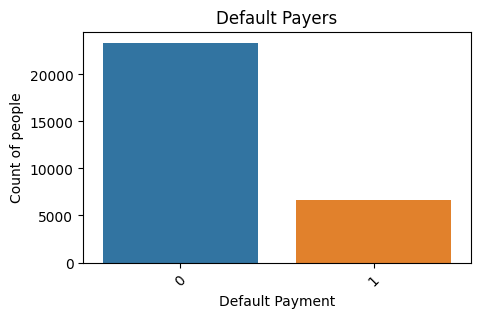

In [39]:
default_pay = df['default_pay'].value_counts()

table = PrettyTable()
table.field_names = ["Default Pay", "Count"]
for value, count in default_pay.items():
    table.add_row([value, count])
print(table)

plt.figure(figsize=(5,3))
sns.barplot(x=default_pay.index, y=default_pay.values)
plt.xticks(rotation=45)
plt.title('Default Payers')
plt.xlabel('Default Payment')
plt.ylabel('Count of people')
plt.show()

It shows a much difference between the people who'll make the default payment and those who will not. The number of people who'll make the payment is far less than those who won't.

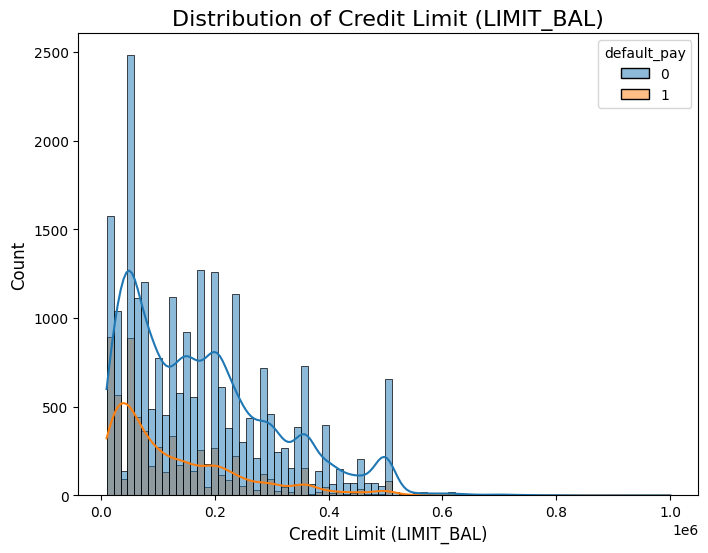

In [40]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='LIMIT_BAL', hue=df.default_pay, kde=True)
plt.title('Distribution of Credit Limit (LIMIT_BAL)', fontsize=16)
plt.xlabel('Credit Limit (LIMIT_BAL)', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.show()

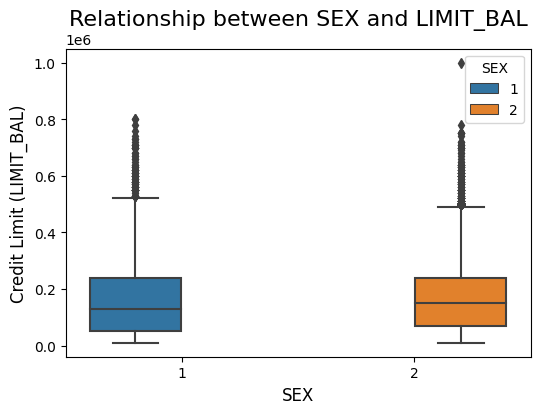

In [41]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='SEX', y='LIMIT_BAL', hue='SEX')
plt.title('Relationship between SEX and LIMIT_BAL', fontsize=16)
plt.xlabel('SEX', fontsize=12)
plt.ylabel('Credit Limit (LIMIT_BAL)', fontsize=12)
plt.show()

The credit limit is quite balanced between both the genders.

In [42]:
defaulters = df.copy()
defaulters.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_pay
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


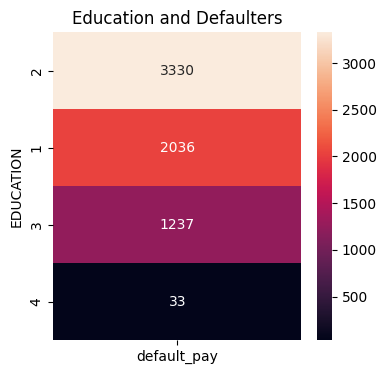

In [43]:
#Is there a connection between education and defaulters?

education = defaulters[['EDUCATION', 'default_pay']].groupby(['EDUCATION'], axis=0).sum().sort_values('default_pay', ascending=False)

plt.figure(figsize=(4,4))
plt.title('Education and Defaulters')

sns.heatmap(education, annot=True, fmt='d')
plt.show()

People of graduate school, university, and high school are highly close to making deault payment.



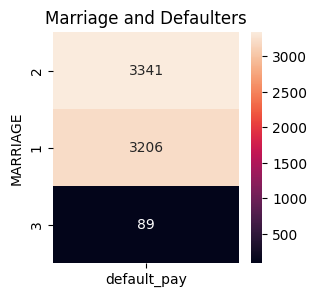

In [44]:
#Is there a connection between marriage and defaulters?

marriage = defaulters[['MARRIAGE', 'default_pay']].groupby(['MARRIAGE'], axis=0).sum().sort_values('default_pay', ascending=False)

plt.figure(figsize=(3,3))
plt.title('Marriage and Defaulters')

sns.heatmap(marriage, annot=True, fmt='d')
plt.show()

It shows that single people are most likely to default followed by married people. Is there any relationship between single, education level and default? Let's check it out.

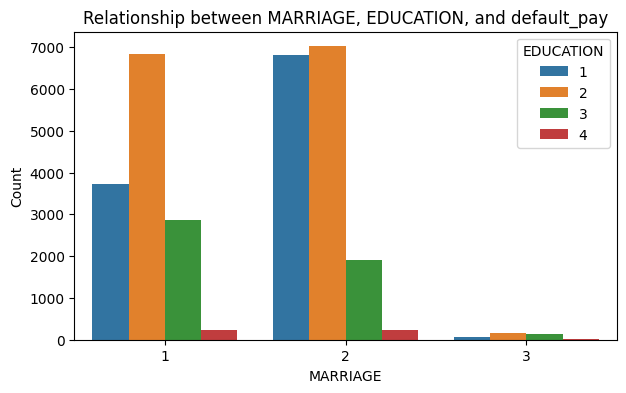

In [45]:
# Plotting the relationship between variables
plt.figure(figsize=(7,4))
sns.countplot(x="MARRIAGE", hue="EDUCATION", data=defaulters)
plt.title("Relationship between MARRIAGE, EDUCATION, and default_pay")
plt.xlabel("MARRIAGE")
plt.ylabel("Count")
plt.legend(title="EDUCATION", loc="upper right")
plt.show()

The graph shows that the university students are most likely to default when they are single. However, both university students and highschool students are likely to default when they are married. **Does marriage and university has something to do with being default?**

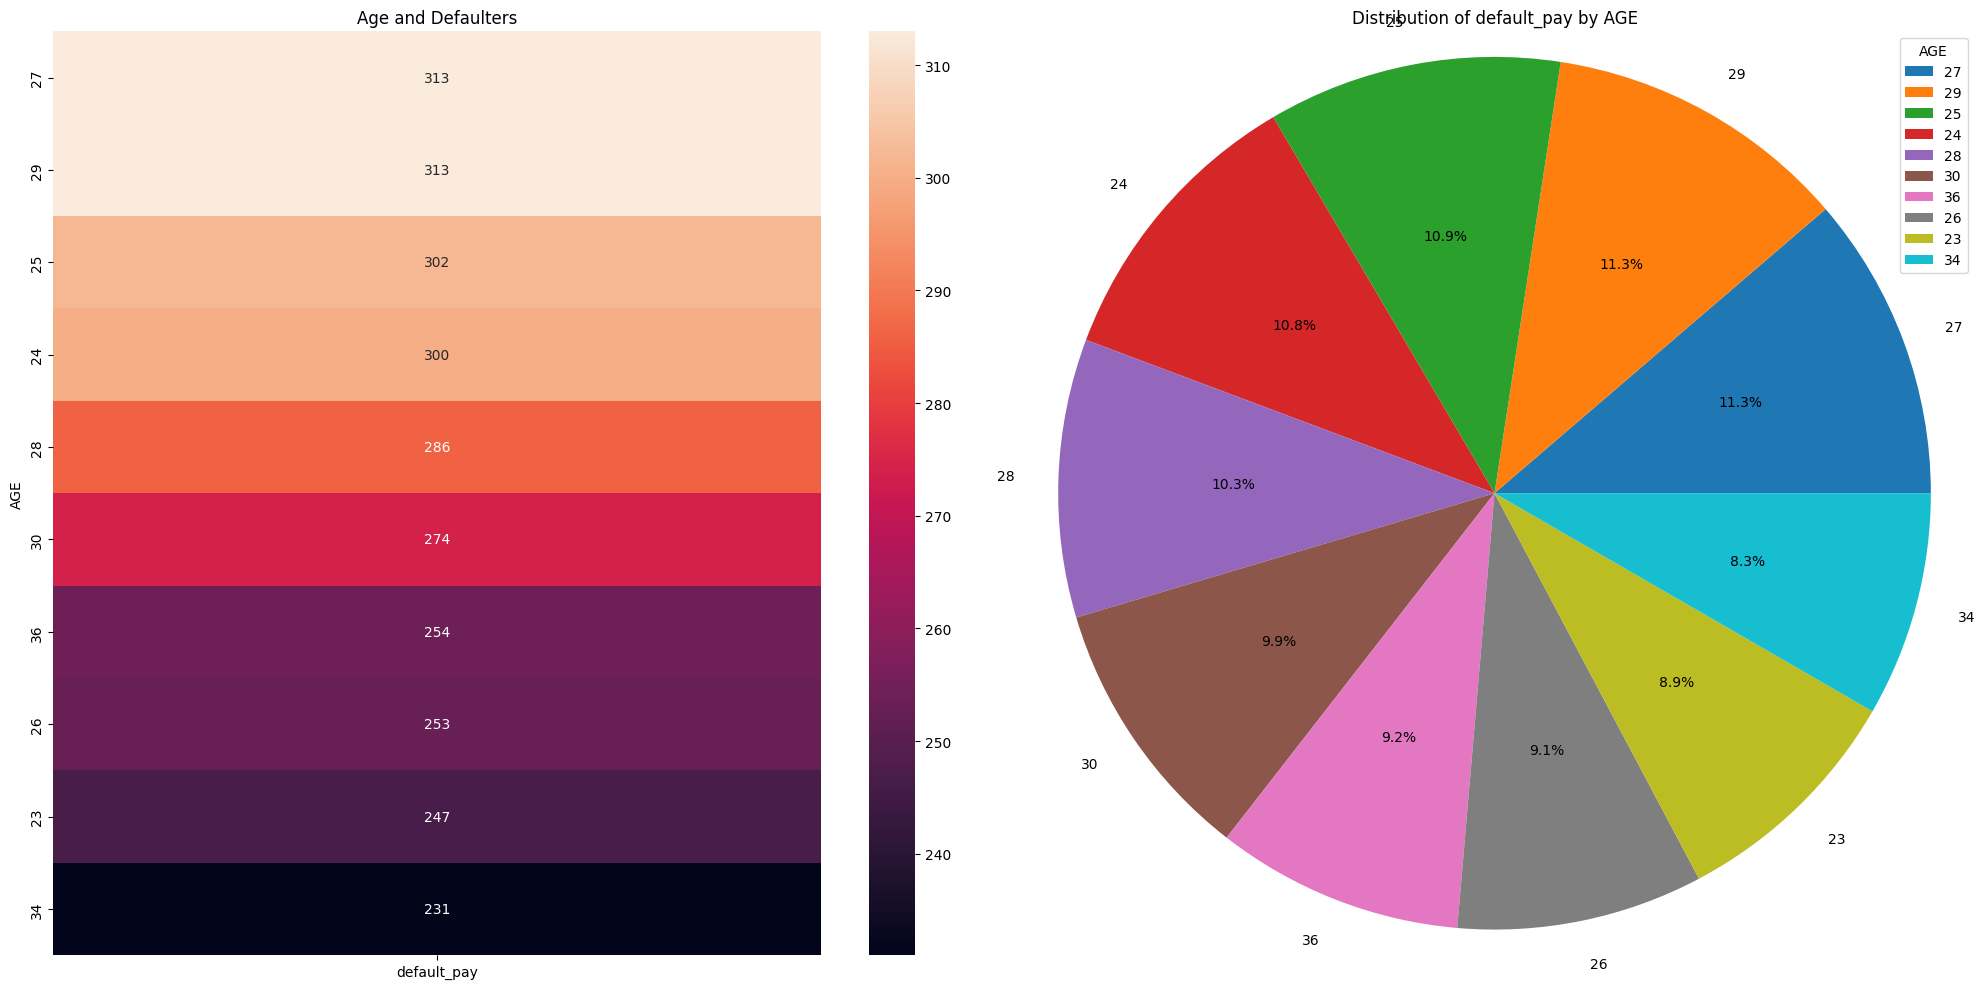

In [46]:
# Is there a connection between people's age and defaulters?
age = defaulters[['AGE', 'default_pay']].groupby(['AGE'], axis=0).sum().sort_values('default_pay', ascending=False)[:10]
# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
# Plot heatmap on the left subplot
axes[0].set_title('Age and Defaulters')
sns.heatmap(age, annot=True, fmt='d', ax=axes[0])

# Plot pie chart on the right subplot
axes[1].set_title("Distribution of default_pay by AGE")
axes[1].pie(age["default_pay"], labels=age.index, autopct='%1.1f%%')
axes[1].axis("equal")  # Ensure the pie is drawn as a circle
axes[1].legend(title="AGE", loc="upper right")

plt.tight_layout() 
plt.show()


d:\Projects\Credit_Default\custom\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


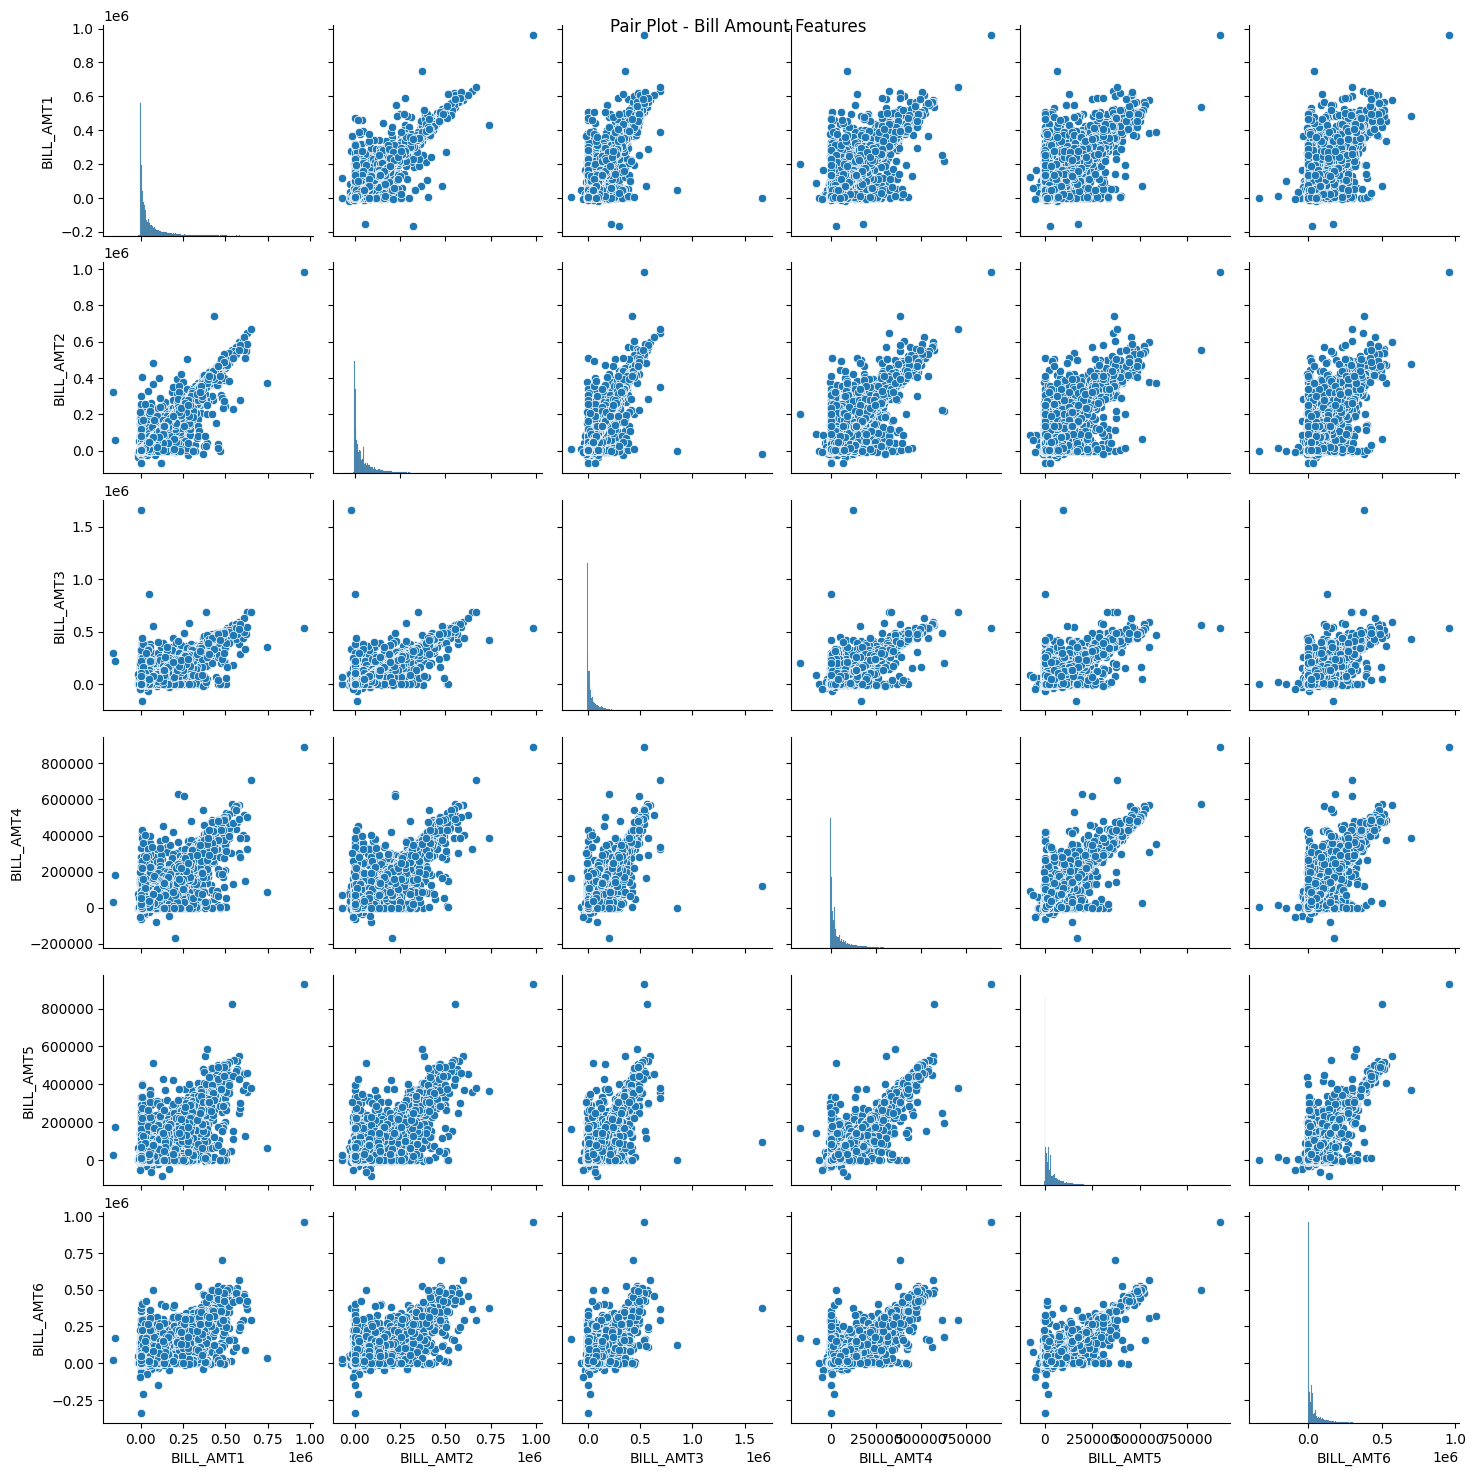

In [47]:
# Select the bill amount columns
bill_amounts = defaulters[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']]

sns.pairplot(bill_amounts)

plt.suptitle('Pair Plot - Bill Amount Features')
plt.show()

C:\Users\darsh\AppData\Local\Temp\ipykernel_32484\2795379896.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(231)


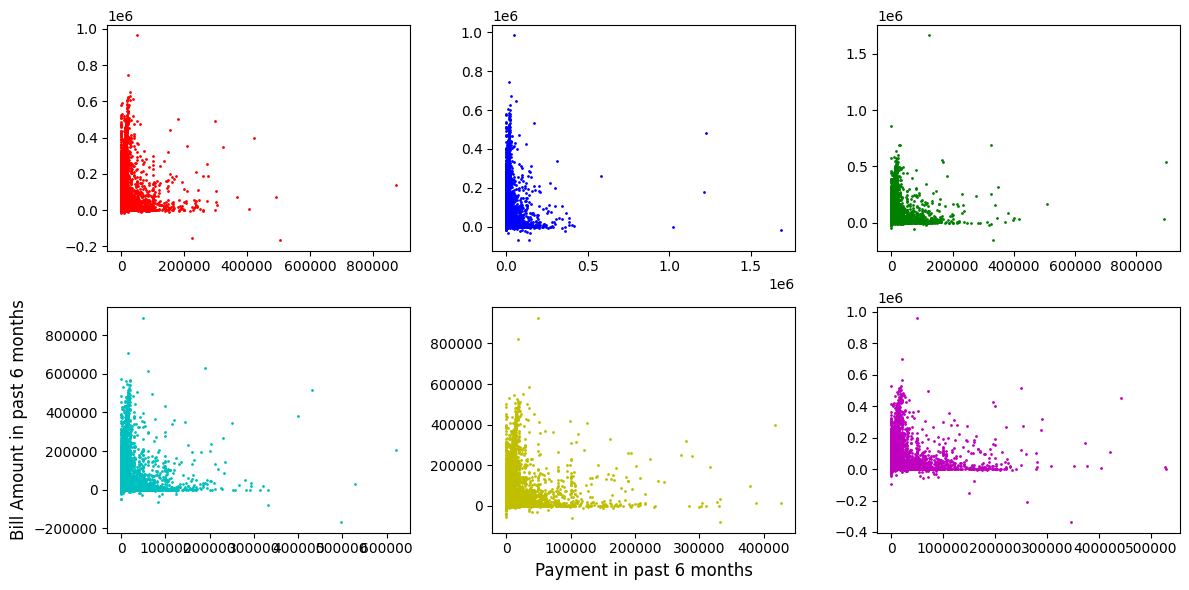

In [48]:
#plotting the relationships between payment amount and bill amount of specific months
plt.subplots(figsize=(12, 6))

plt.subplot(231)
plt.scatter(x=defaulters.PAY_AMT1, y=defaulters.BILL_AMT1, c='r', s=1)

plt.subplot(232)
plt.scatter(x=defaulters.PAY_AMT2, y=defaulters.BILL_AMT2, c='b', s=1)

plt.subplot(233)
plt.scatter(x=defaulters.PAY_AMT3, y=defaulters.BILL_AMT3, c='g', s=1)

plt.subplot(234)
plt.scatter(x=defaulters.PAY_AMT4, y=defaulters.BILL_AMT4, c='c', s=1)
plt.ylabel("Bill Amount in past 6 months", fontsize=12)

plt.subplot(235)
plt.scatter(x=defaulters.PAY_AMT5, y=defaulters.BILL_AMT5, c='y', s=1)
plt.xlabel("Payment in past 6 months", fontsize=12)

plt.subplot(236)
plt.scatter(x=defaulters.PAY_AMT6, y=defaulters.BILL_AMT6, c='m', s=1)

plt.tight_layout()
plt.show()

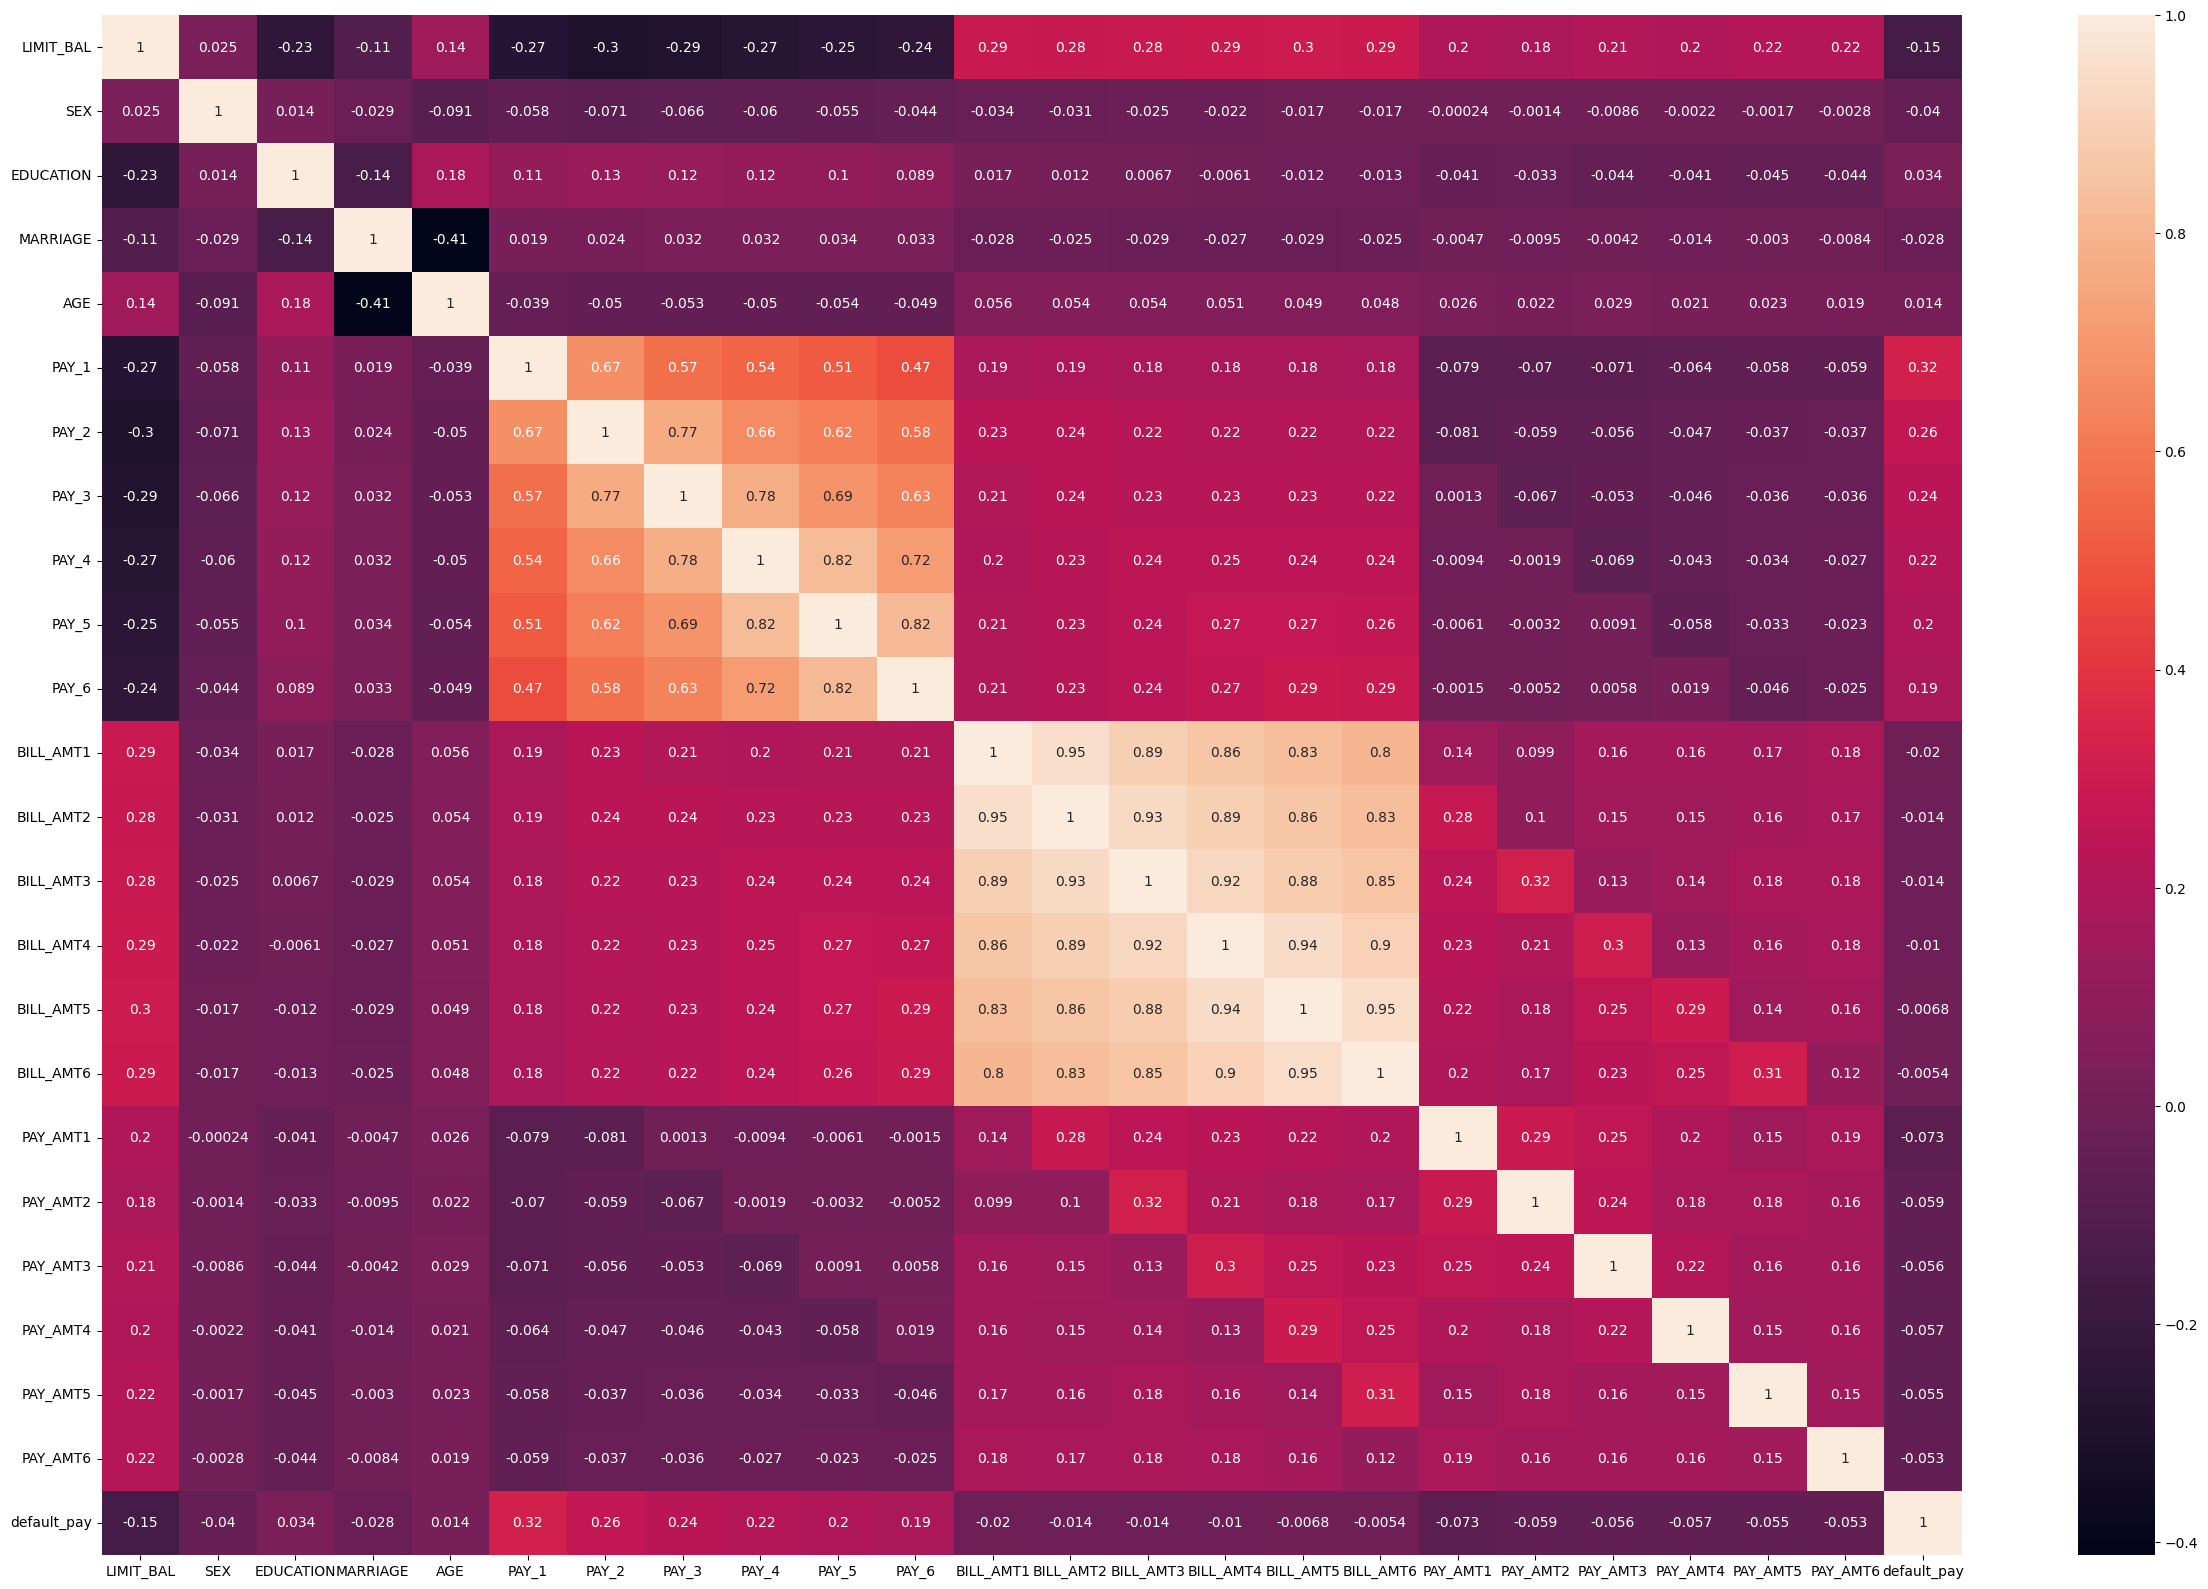

In [49]:
plt.subplots(figsize=(30,20))
sns.heatmap(defaulters.corr(), annot=True)
plt.show()

The very interesting fact that we can determined from the correlation plot is that the payment status of the last 6 months is very important in determining the default status.

In [55]:
X = defaulters.drop('default_pay', axis=1)
y = defaulters['default_pay']

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)
X_train


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
28465,240000.0,2,1,1,40,-2,-2,-2,-2,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27622,50000.0,2,1,2,23,-1,-1,-1,-1,-1,...,2299.0,4800.0,9810.0,660.0,2548.0,2321.0,4800.0,9810.0,660.0,2980.0
28376,50000.0,2,2,1,36,2,2,2,2,0,...,49125.0,47956.0,43578.0,35126.0,0.0,4700.0,0.0,2004.0,3500.0,0.0
10917,200000.0,2,3,1,54,6,5,4,3,2,...,104686.0,102549.0,101400.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27234,240000.0,1,1,1,35,-1,-1,-1,0,-1,...,21790.0,17102.0,13367.0,22659.0,2017.0,21817.0,1120.0,13434.0,22772.0,22820.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29802,50000.0,1,2,2,32,0,0,0,0,0,...,55739.0,55957.0,29238.0,6119.0,2000.0,3000.0,1591.0,72.0,1134.0,73421.0
5390,200000.0,1,1,2,37,2,2,2,2,2,...,168386.0,164182.0,169029.0,172084.0,13500.0,6000.0,0.0,7500.0,6000.0,4000.0
860,50000.0,1,1,2,26,-2,-2,-2,-2,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15795,70000.0,2,2,2,25,0,0,0,0,2,...,51152.0,35122.0,28633.0,28039.0,3000.0,2000.0,4500.0,1200.0,0.0,1200.0


In [56]:
X_test

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
2308,30000.0,1,2,2,25,0,0,0,0,0,...,11581.0,12580.0,13716.0,14828.0,1500.0,2000.0,1500.0,1500.0,1500.0,2000.0
22404,150000.0,2,1,2,26,0,0,0,0,0,...,116684.0,101581.0,77741.0,77264.0,4486.0,4235.0,3161.0,2647.0,2669.0,2669.0
23397,70000.0,2,3,1,32,0,0,0,0,0,...,68530.0,69753.0,70111.0,70212.0,2431.0,3112.0,3000.0,2438.0,2500.0,2554.0
25058,130000.0,1,3,2,49,0,0,0,0,0,...,16172.0,16898.0,11236.0,6944.0,1610.0,1808.0,7014.0,27.0,7011.0,4408.0
2664,50000.0,2,2,2,36,0,0,0,0,0,...,42361.0,19574.0,20295.0,19439.0,2000.0,1500.0,1000.0,1800.0,0.0,1000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3941,410000.0,2,1,2,34,1,-1,-1,-2,-2,...,0.0,0.0,0.0,666.0,13621.0,0.0,0.0,0.0,666.0,0.0
17854,210000.0,1,1,2,27,0,0,0,0,0,...,45622.0,47232.0,47583.0,53032.0,8000.0,5000.0,4000.0,3000.0,8000.0,3000.0
95,90000.0,1,2,2,35,0,0,0,0,0,...,87653.0,35565.0,30942.0,30835.0,3621.0,3597.0,1179.0,1112.0,1104.0,1143.0
6279,220000.0,2,2,1,36,0,0,0,0,0,...,142295.0,145127.0,148159.0,151462.0,5100.0,5163.0,5196.0,5372.0,5761.0,5396.0


In [58]:
preprocessor = StandardScaler()
X_train_final = preprocessor.fit_transform(X_train)
X_test_final = preprocessor.transform(X_test)
X_train_final

array([[ 0.56391448,  0.80648893, -1.12912223, ..., -0.30370385,
        -0.30669703, -0.29550752],
       [-0.90610925,  0.80648893, -1.12912223, ...,  0.3050678 ,
        -0.26502896, -0.12727157],
       [-0.90610925,  0.80648893,  0.21316856, ..., -0.17934316,
        -0.08573001, -0.29550752],
       ...,
       [-0.90610925, -1.23994262, -1.12912223, ..., -0.30370385,
        -0.30669703, -0.29550752],
       [-0.75136991,  0.80648893,  0.21316856, ..., -0.22923637,
        -0.30669703, -0.2277615 ],
       [-0.05504288,  0.80648893,  0.21316856, ..., -0.20131106,
         0.58979774, -0.210825  ]])

**A. Modelling**

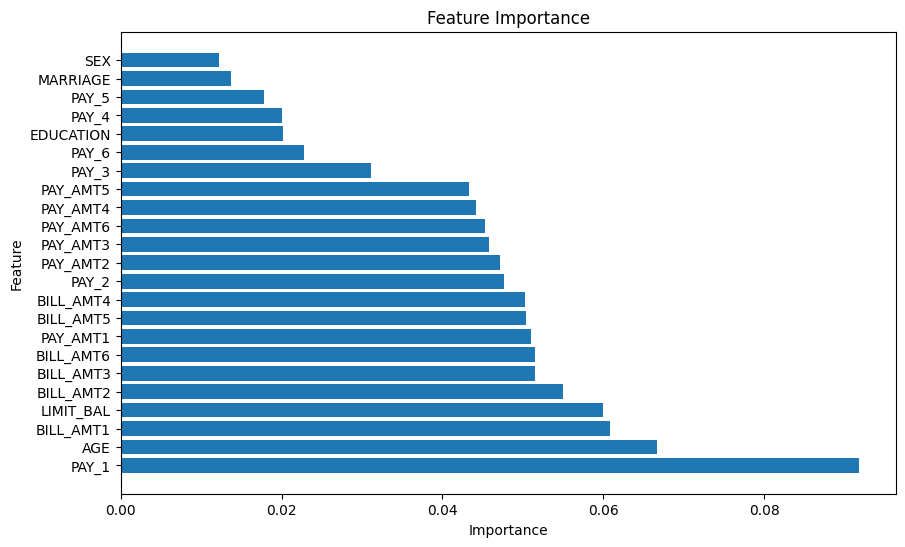

      Feature  Importance
5       PAY_1    0.091777
4         AGE    0.066698
11  BILL_AMT1    0.060798
0   LIMIT_BAL    0.059959
12  BILL_AMT2    0.054969
13  BILL_AMT3    0.051504
16  BILL_AMT6    0.051503
17   PAY_AMT1    0.051043
15  BILL_AMT5    0.050380
14  BILL_AMT4    0.050255
6       PAY_2    0.047614
18   PAY_AMT2    0.047210
19   PAY_AMT3    0.045832
22   PAY_AMT6    0.045236
20   PAY_AMT4    0.044159
21   PAY_AMT5    0.043313
7       PAY_3    0.031078
10      PAY_6    0.022790
2   EDUCATION    0.020155
8       PAY_4    0.020055
9       PAY_5    0.017777
3    MARRIAGE    0.013685
1         SEX    0.012211


In [59]:
# Initializing the Random Forest classifier
rf = RandomForestClassifier()
rf.fit(X, y)
importances = rf.feature_importances_

feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values('Importance', ascending=False)

# Plotting the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

# Printing the feature importances
print(feature_importances)


In [60]:
defaulters.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default_pay'],
      dtype='object')

In [73]:
from xgboost import XGBClassifier

In [76]:
# Initializing the models
logreg = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
xgb1 = XGBClassifier()


# Training the models
logreg.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
xgb1.fit(X_train,y_train)

# Making predictions
logreg_pred = logreg.predict(X_test)
dt_pred = dt.predict(X_test)
rf_pred = rf.predict(X_test)
xgb_pred = xgb.predict(X_test)


# Calculating accuracy
logreg_accuracy = accuracy_score(y_test, logreg_pred)
dt_accuracy = accuracy_score(y_test, dt_pred)
rf_accuracy = accuracy_score(y_test, rf_pred)
xgb_accuracy = accuracy_score(y_test, xgb_pred)

# Printing the accuracy scores
print("Logistic Regression Accuracy:", logreg_accuracy)
print("Decision Tree Accuracy:", dt_accuracy)
print("Random Forest Accuracy:", rf_accuracy)
print('XGB Accuracy:', xgb_accuracy)

d:\Projects\Credit_Default\custom\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.5745773592980954
Decision Tree Accuracy: 0.7478065482559384
Random Forest Accuracy: 0.8423924673657179
XGB Accuracy: 0.6795420500748983


In [75]:
# Initializing the models
logreg = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
xgb = XGBClassifier()



# Training the models
logreg.fit(X_train_final, y_train)
dt.fit(X_train_final, y_train)
rf.fit(X_train_final, y_train)
xgb.fit(X_train_final, y_train)

# Making predictions
logreg_pred = logreg.predict(X_test_final)
dt_pred = dt.predict(X_test_final)
rf_pred = rf.predict(X_test_final)
xgb_pred = xgb.predict(X_test_final)


# Calculating accuracy
logreg_accuracy = accuracy_score(y_test, logreg_pred)
dt_accuracy = accuracy_score(y_test, dt_pred)
rf_accuracy = accuracy_score(y_test, rf_pred)
xgb_accuracy = accuracy_score(y_test, xgb_pred)

# Printing the accuracy scores
print("Logistic Regression Accuracy:", logreg_accuracy)
print("Decision Tree Accuracy:", dt_accuracy)
print("Random Forest Accuracy:", rf_accuracy)
print("XGBoost Accuracy:", xgb_accuracy)

Logistic Regression Accuracy: 0.7179542050074899
Decision Tree Accuracy: 0.749518510592767
Random Forest Accuracy: 0.8443184249946502
XGBoost Accuracy: 0.8229188957842928


In [77]:
# since we know that our data is imbalanced, let's apply SMOTE to balance the dataset and see if it improves our accuracy.
X = defaulters.drop('default_pay', axis=1)
y = defaulters['default_pay']

smote = SMOTE()
x_smote, y_smote = smote.fit_resample(X,y)

X_train, X_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.2, random_state=42)

# Initializing the models
logreg = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
xgb_classifier = XGBClassifier()

# Training the models
logreg.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
xgb_classifier.fit(X_train, y_train)


# Making predictions
logreg_pred = logreg.predict(X_test_final)
dt_pred = dt.predict(X_test_final)
rf_pred = rf.predict(X_test_final)
xgb_pred = xgb_classifier.predict(X_test_final)

# Calculating accuracy
logreg_accuracy = accuracy_score(y_test, logreg_pred)
dt_accuracy = accuracy_score(y_test, dt_pred)
rf_accuracy = accuracy_score(y_test, rf_pred)
xgb_accuracy = accuracy_score(y_test, xgb_pred)

# Printing the accuracy scores
print("Logistic Regression Accuracy:", logreg_accuracy)
print("Decision Tree Accuracy:", dt_accuracy)
print("Random Forest Accuracy:", rf_accuracy)
print("XGBoost Accuracy:", xgb_accuracy)

d:\Projects\Credit_Default\custom\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.5497539054140809
Decision Tree Accuracy: 0.43034453242028675
Random Forest Accuracy: 0.5270704044511021
XGBoost Accuracy: 0.5018189599828804


d:\Projects\Credit_Default\custom\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
d:\Projects\Credit_Default\custom\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
d:\Projects\Credit_Default\custom\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [79]:
# since we know that our data is imbalanced, let's apply SMOTE to balance the dataset and see if it improves our accuracy.
X = defaulters.drop('default_pay', axis=1)
y = defaulters['default_pay']

smote = SMOTE()
x_smote, y_smote = smote.fit_resample(X,y)

X_train, X_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.2, random_state=42)

preprocessor = StandardScaler()
X_train_final = preprocessor.fit_transform(X_train)
X_test_final = preprocessor.transform(X_test)

# Initializing the models
logreg = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
xgb_classifier = XGBClassifier()

# Training the models
logreg.fit(X_train_final, y_train)
dt.fit(X_train_final, y_train)
rf.fit(X_train_final, y_train)
xgb_classifier.fit(X_train, y_train)


# Making predictions
logreg_pred = logreg.predict(X_test_final)
dt_pred = dt.predict(X_test_final)
rf_pred = rf.predict(X_test_final)
xgb_pred = xgb_classifier.predict(X_test_final)

# Calculating accuracy
logreg_accuracy = accuracy_score(y_test, logreg_pred)
dt_accuracy = accuracy_score(y_test, dt_pred)
rf_accuracy = accuracy_score(y_test, rf_pred)
xgb_accuracy = accuracy_score(y_test, xgb_pred)

# Printing the accuracy scores
print("Logistic Regression Accuracy:", logreg_accuracy)
print("Decision Tree Accuracy:", dt_accuracy)
print("Random Forest Accuracy:", rf_accuracy)
print("XGBoost Accuracy:", xgb_accuracy)

Logistic Regression Accuracy: 0.7193451744061631
Decision Tree Accuracy: 0.7582923175690135
Random Forest Accuracy: 0.8462443826235823
XGBoost Accuracy: 0.5023539482131393


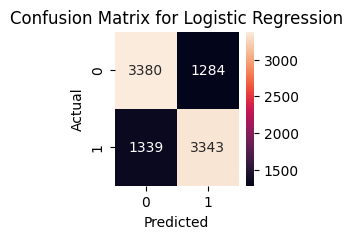

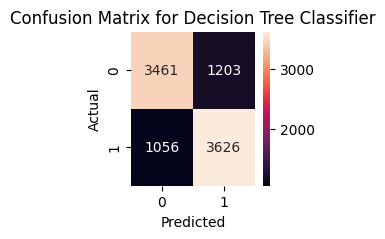

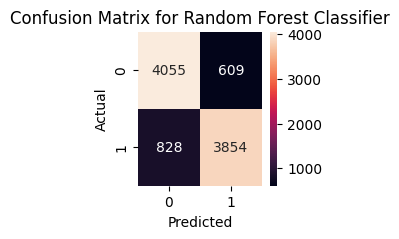

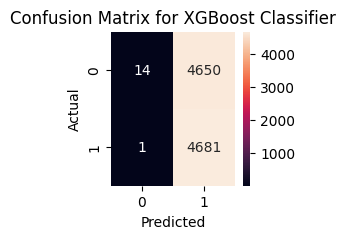

In [80]:
# Define a function to plot the confusion matrix
import numpy as np
def plot_confusion_matrix(y_true, y_pred, labels, model_name):
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    plt.figure(figsize=(2,2))
    sns.heatmap(cm, annot=True, fmt='d')
    plt.title('Confusion Matrix for ' + model_name)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.xticks(ticks=np.arange(len(labels))+0.5, labels=labels)
    plt.yticks(ticks=np.arange(len(labels))+0.5, labels=labels)
    plt.show()

# Plotting the confusion matrix and classification report for each model
plot_confusion_matrix(y_test, logreg_pred, labels=[0, 1], model_name = "Logistic Regression")
plot_confusion_matrix(y_test, dt_pred, labels=[0, 1], model_name = "Decision Tree Classifier")
plot_confusion_matrix(y_test, rf_pred, labels=[0, 1], model_name = "Random Forest Classifier")
plot_confusion_matrix(y_test, xgb_pred, labels=[0, 1], model_name = "XGBoost Classifier")